In [2]:
import pandas as pd

In [3]:
matches = pd.read_csv('C:/Users/Princess Muthimunye/OneDrive/Documents/Machine Learning Datasets/IPL Dataset and Code/IPL Matches 2008-2020.csv')
deliveries = pd.read_csv('C:/Users/Princess Muthimunye/OneDrive/Documents/Machine Learning Datasets/IPL Dataset and Code/IPL Ball-by-Ball 2008-2020.csv')

In [4]:
matches['season'] = pd.DatetimeIndex(matches['date'], dayfirst=True).year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [19]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [16]:
# Top 10 Players with the most MoM wins 
matches['player_of_match'].value_counts()[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

In [18]:
# Teams ranked by most wins
matches['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [90]:
# Biggest win by margin (runs)
runs_results = matches[matches['result'] == 'runs']
runs_results.sort_values(by='result_margin', ascending=False)[:5][['id', 'winner', 'result_margin']]


,id,winner,result_margin
620,1082635,Mumbai Indians,146.0
560,980987,Royal Challengers Bangalore,144.0
0,335982,Kolkata Knight Riders,140.0
497,829785,Royal Challengers Bangalore,138.0
351,598027,Royal Challengers Bangalore,130.0


In [92]:
# Biggest win by margin (wickets)
wickets_results = matches[matches['result'] == 'wickets']
wickets_results.sort_values(by='result_margin')[:5]['result_margin']

500    1.0
636    1.0
642    1.0
536    2.0
99     2.0
Name: result_margin, dtype: float64

<AxesSubplot: ylabel='dismissal_kind'>

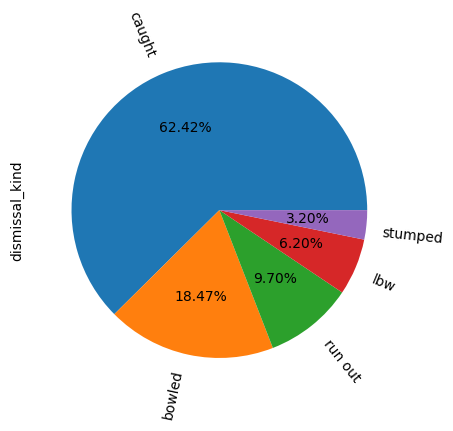

In [93]:
# Distribution of dismissals
dismissals = deliveries['dismissal_kind'].value_counts()
total =  dismissals.sum()
dismissals_distribution = dismissals.apply(lambda x:  round ((x/total * 100), ndigits=2))[:5]
dismissals_distribution.plot.pie(autopct='%1.2f%%', rotatelabels=True)

In [25]:
stuff = deliveries[deliveries['id'] == 1178394]
joseph = stuff[stuff['bowler'] == 'AS Joseph']
joseph['bowling_team'].unique()

array(['Mumbai Indians'], dtype=object)

<AxesSubplot: xlabel='batsman'>

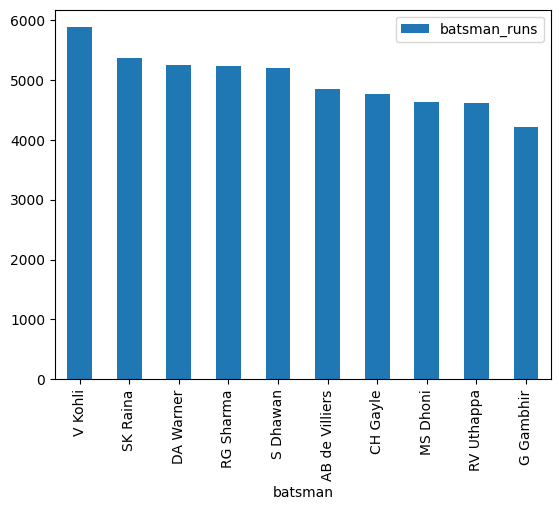

In [41]:
# Top 10 batsmen ranked by most runs (All Time)
# deliveries.groupby('batsman').sum(numeric_only=True)['batsman_runs'].sort_values(ascending=False)[:20]
top_batsman = deliveries[['batsman', 'batsman_runs']].groupby('batsman').sum().sort_values(by='batsman_runs', ascending=False)[:10]
top_batsman.plot.bar()

In [11]:
# Top 10 bowlers ranked by most wickets (All Time)
top_bowlers = deliveries[['bowler', 'is_wicket']].groupby('bowler').sum().sort_values(by='is_wicket', ascending=False).rename(columns={'is_wicket':'wickets'})[:10]
top_bowlers.plot.bar()

,wickets
bowler,
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161
R Ashwin,153
B Kumar,146
SP Narine,143
UT Yadav,137


In [20]:
# Top batsman ranked by most runs in each playing season
season_data = matches[['id', 'season']].merge(deliveries, on='id', how='inner')
runs_season = season_data[['season', 'batsman', 'batsman_runs']].groupby(['season', 'batsman']).sum().sort_values(by=['season','batsman_runs'], ascending=False)
runs_season.groupby('season').first(numeric_only=False)
# runs_season.groupby('season').max()

,batsman_runs
season,
2008,616
2009,572
2010,618
2011,608
2012,733
2013,733
2014,660
2015,562
2016,973


In [51]:
# Top 10 Batsman ranked by most runs in a match
deliveries[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum(numeric_only=True).sort_values(by='batsman_runs', ascending=False)[:10]

,,batsman_runs
id,batsman,
598027,CH Gayle,175
335982,BB McCullum,158
829795,AB de Villiers,133
1216510,KL Rahul,132
980987,AB de Villiers,129
548372,CH Gayle,128
1136602,RR Pant,128
419137,M Vijay,127
1082627,DA Warner,126


In [28]:
# Top Bowler with best bowling figures in a match
deliveries[['id', 'bowler', 'is_wicket', 'total_runs']].groupby(['id', 'bowler']).sum(numeric_only=True).sort_values(by=['is_wicket', 'total_runs'], ascending=[False, True]).rename(columns={'is_wicket':'wickets', 'total_runs': 'runs'})[:1]

,,wickets,runs
id,bowler,,
1178394,AS Joseph,6,14


In [93]:
# Top 10 Batsman ranked by average runs per match
deliveries[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum().groupby('batsman').mean().sort_values(by='batsman_runs', ascending=False).rename(columns={'batsman_runs': 'batsman_average'})[:10]

,batsman_average
batsman,
JM Bairstow,37.619048
LMP Simmons,37.206897
DA Warner,37.000000
KL Rahul,36.763889
CH Gayle,36.427481
HM Amla,36.062500
SE Marsh,35.898551
ML Hayden,34.593750
MEK Hussey,34.086207


In [61]:
# strike_rate = runs_scored / deliveries faced
#top_ten_batsmen = deliveries[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum().sort_values(by='batsman_runs', ascending=False)[:10]
deliveries_faced = deliveries[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).count().sort_values(by='batsman_runs', ascending=False).rename(columns={'batsman_runs': 'deliveries_faced'})
deliveries_faced

,,deliveries_faced
id,batsman,
335982,BB McCullum,77
392236,MK Pandey,74
336019,SE Marsh,72
419131,DA Warner,72
548309,AM Rahane,72
...,...,...
419154,AG Paunikar,1
1181764,KH Pandya,1
598030,CH Morris,1


In [47]:
top_ten_batsmen = deliveries[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum().sort_values(by='batsman_runs', ascending=False)[:20]
top_ten_batsmen

,,batsman_runs
id,batsman,
598027,CH Gayle,175
335982,BB McCullum,158
829795,AB de Villiers,133
1216510,KL Rahul,132
980987,AB de Villiers,129
548372,CH Gayle,128
1136602,RR Pant,128
419137,M Vijay,127
1082627,DA Warner,126


In [80]:
# Top 10 Batsman ranked by strike-rate in a match
merged = top_ten_batsmen.merge(deliveries_faced, on=['id', 'batsman'], how='inner')
f = lambda x: round((x['batsman_runs'] / x['deliveries_faced']) * 100)
batsmen_strike_rate = pd.DataFrame(merged.apply(f, axis='columns')).rename(columns={0: 'strike_rate'}).sort_values(by='strike_rate', ascending=False)[:10]
batsmen_strike_rate

,,strike_rate
id,batsman,
598027,CH Gayle,254
980987,AB de Villiers,243
419137,M Vijay,223
829795,AB de Villiers,218
335983,MEK Hussey,215
1082627,DA Warner,210
548372,CH Gayle,206
734049,WP Saha,205
335982,BB McCullum,205


<AxesSubplot: xlabel='fielder'>

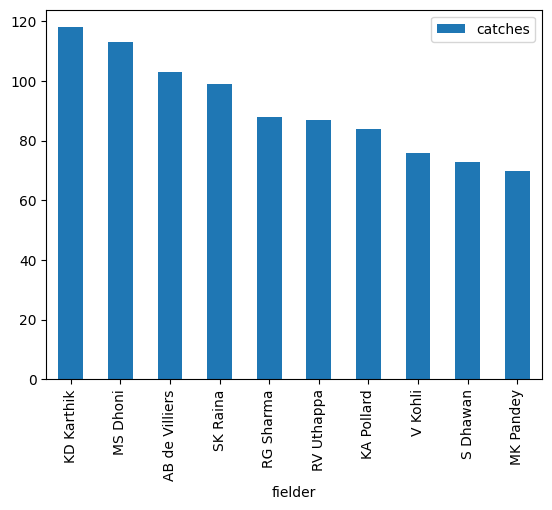

In [94]:
# Top 10 Players with most catches
most_catches = deliveries[['fielder', 'dismissal_kind']][deliveries['dismissal_kind'] == 'caught'].groupby('fielder').count().rename(columns={'dismissal_kind': 'catches'}).sort_values(by='catches', ascending=False)[:10]
most_catches.plot.bar()

In [101]:
# Player Summary Statistics 
player = ['V Kohli', 'CH Gayle', 'DA Warner', 'BB McCullum', 'KL Rahul', 'CH Morris', 'Q de Kock'][3]
player_career = deliveries[deliveries['batsman'] == player ]

matches_played = len(player_career['id'].unique())

balls_faced = int( player_career[player_career['extra_runs'] == 0][['batsman', 'ball']].groupby('batsman').count()['ball'])
#player_career[player_career['extras_type'] != ['wides', 'noballs', 'penalty']][['batsman', 'ball']].groupby('batsman').count()['ball']

runs_scored = int(player_career[['batsman', 'batsman_runs']].groupby('batsman').sum()['batsman_runs'])

average = round (float (player_career[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum().groupby('batsman').mean()['batsman_runs']), ndigits=2)

strike_rate = round (( runs_scored / balls_faced ) * 100, ndigits=2)

player_innings_runs = player_career[['id', 'batsman', 'batsman_runs']].groupby(['id', 'batsman']).sum(numeric_only=True).sort_values(by='batsman_runs' ,ascending=False)
highscore = int(player_innings_runs[:1]['batsman_runs'])

centuries = int (player_innings_runs[player_innings_runs['batsman_runs'] >= 100].count())

above_fifties = player_innings_runs[player_innings_runs['batsman_runs'] >= 50]
fifties = int (above_fifties[above_fifties['batsman_runs'] < 100].count() )

sixes = int (player_career[['batsman', 'batsman_runs']][player_career['batsman_runs'] == 6].groupby('batsman').count()['batsman_runs'])

fours = int (player_career[['batsman', 'batsman_runs']][player_career['batsman_runs'] == 4].groupby('batsman').count()['batsman_runs'])

data = {'Matches': [matches_played], 'Runs': [runs_scored], 'Balls Faced': [balls_faced], 'Average': [average], 'Strike Rate': [strike_rate], 'Highscore': [highscore], '100': [centuries], '50': [fifties], '4s': [fours], '6s': [sixes]}

pd.DataFrame(data, index=[player])

,Matches,Runs,Balls Faced,Average,Strike Rate,Highscore,100,50,4s,6s
BB McCullum,109,2880,2121,26.42,135.79,158,2,13,293,130


In [78]:
deliveries[deliveries['extra_runs'] != 0]['extras_type'].unique()

array(['byes', 'wides', 'legbyes', 'noballs', 'penalty'], dtype=object)

In [37]:
deliveries[deliveries['id'] == 829795].iloc[0]

id                                      829795
city                                    Mumbai
date                                10-05-2015
player_of_match                 AB de Villiers
venue                         Wankhede Stadium
neutral_venue                                0
team1                           Mumbai Indians
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                              bat
winner             Royal Challengers Bangalore
result                                    runs
result_margin                             39.0
eliminator                                   N
method                                     NaN
umpire1                              JD Cloete
umpire2                          C Shamshuddin
season                                    2015
Name: 502, dtype: object